# 1) Data Exploration

In this approach, we do not separate in up to dd7 and up to dd5. Let's assume we can do better! Instead we will add inferred data to the dataset.

We will use the domain knowledge to reduce the dataset columns (and overall size) at first before starting more feature selection. Then, we will proceed to feature selection (TODO) before doing cross-validations with models.


**Model to beat**: The models built using random forests and Gaussian process modeling predicted insufficient CM content for a differentiation process with 90% accuracy and precision on dd7 of the protocol and with 85% accuracy and 82% precision at a substantially earlier stage: dd5.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ROOT_PATH = "/data/notebook_files/"

# read the data
X_train = pd.read_excel(ROOT_PATH + "train_data.xlsx", sheet_name=0)
y_train = pd.read_excel(ROOT_PATH + "train_data.xlsx", sheet_name=1)

# read the testing data
X_test = pd.read_excel(ROOT_PATH + "test_data_corrected.xlsx", sheet_name=0)
y_test = pd.read_excel(ROOT_PATH + "test_data_corrected.xlsx", sheet_name=1)

In [2]:
X_train.head()

,dd0 Cell Density,dd0-dd1 Cell Density Gradient,dd1 Cell Density,dd1-dd2 Cell Density Gradient,dd2 Cell Density,dd2-dd3 Cell Density Gradient,dd3 Cell Density,dd3-dd5 Cell Density Gradient,dd5 Cell Density,dd5-dd7 Cell Density Gradient,...,dd0 Lactate Concentration,dd1 Lactate Concentration,dd3 Lactate Concentration,dd5 Lactate Concentration,dd7 Lactate Concentration,dd0 Glucose Concentration,dd1 Glucose Concentration,dd3 Glucose Concentration,dd5 Glucose Concentration,dd7 Glucose Concentration
0,0.725,0.213793,0.88,0.19007,1.047261,-0.040354,1.005,0.810945,1.820,-0.144394,...,13.6750,14.025,2.090,17.780,5.935,9.1800,3.895,9.8750,0.635,7.555
1,0.650,0.384615,0.90,0.19007,1.071063,0.246426,1.335,0.749064,2.335,-0.144394,...,14.1150,13.350,2.165,17.105,12.510,9.5200,4.470,10.1450,1.010,2.910
2,0.880,0.022727,0.90,0.19007,1.071063,-0.038338,1.030,0.611650,1.660,-0.144394,...,14.4400,13.670,1.775,19.050,7.210,9.0275,4.415,10.2700,0.000,6.745
3,0.785,0.363057,1.07,0.19007,1.273374,-0.462059,0.685,0.510949,1.035,-0.144394,...,13.9950,11.955,0.995,16.430,14.295,8.9950,5.155,10.2550,2.270,2.135
4,0.410,0.975610,0.81,0.19007,0.963956,1.778134,2.678,-0.002987,2.670,-0.376404,...,13.0575,11.300,15.100,16.425,14.455,9.5475,1.700,0.0175,1.610,1.065


In [3]:
list(X_train.columns)

['dd0 Cell Density',
 'dd0-dd1 Cell Density Gradient',
 'dd1 Cell Density',
 'dd1-dd2 Cell Density Gradient',
 'dd2 Cell Density',
 'dd2-dd3 Cell Density Gradient',
 'dd3 Cell Density ',
 'dd3-dd5 Cell Density Gradient',
 'dd5 Cell Density',
 'dd5-dd7 Cell Density Gradient',
 'dd7 Cell Density',
 'dd0 Aggregate Size',
 'dd0-dd1 Aggregate Size Gradient',
 'dd1 Aggregate Size ',
 'dd1-dd2 Aggregate Size Gradient',
 'dd2 Aggregate Size ',
 'dd2-dd3 Aggregate Size Gradient',
 'dd3 Aggregate Size ',
 'dd3-dd5 Aggregate Size Gradient',
 'dd5 Aggregate Size ',
 'dd7 Aggregate Size ',
 'dd5-dd7 Aggregate Size Gradient',
 'Preculture Time [h]',
 'Start Preculture Perfusion [h after inoc] d1-d2',
 'Presence of  IWP2 [h]',
 'Average DO concentration d0',
 'Average DO concentration d1',
 'Average DO concentration dd0',
 'Average DO concentration dd1',
 'Average DO concentration dd2',
 'Average DO concentration dd3',
 'Average DO concentration dd4',
 'Average DO concentration dd5',
 'Average DO con

In [4]:
# We remove spaces at the end of certain column names to make next steps easier
X_train.columns = X_train.columns.str.rstrip()
X_test.columns = X_test.columns.str.rstrip()

**Averaging**: One simple method is to average the concentration gradient or averages across all time points. This will give you a single value that represents the overall trend during differentiation. However, this method may not capture the variability or dynamics of the system.

**Time-series analysis**: We can use time-series analysis techniques to extract features such as slope, rate of change, or amplitude of the concentration gradient or averages over time. This can provide more detailed information about the differentiation process and may improve the performance of the machine learning model.

**Feature engineering**: Alternatively, we could create new features based on the cell density measurements at different time points. For example, you could calculate the maximum, minimum, or standard deviation of the cell density measurements over time.

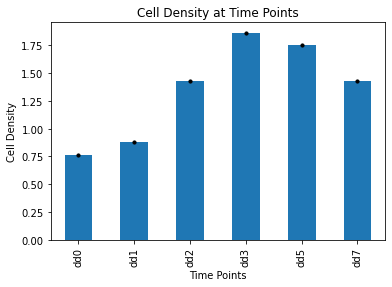

In [5]:
cols = X_train.filter(regex=r'^dd[\d] Cell Density$')
averages = cols.mean()

fig, ax = plt.subplots()
averages.plot(kind='bar', x=averages.index, y=averages.values, ax=ax)

ax.set_xticklabels([col.split(' ', 1)[0] for col in cols])

# plot a dot at the top middle of each bar
for i, v in enumerate(averages.values):
    ax.scatter(i, v, s=10, color='k')


plt.xlabel('Time Points')
plt.ylabel('Cell Density')
plt.title('Cell Density at Time Points')
plt.show()

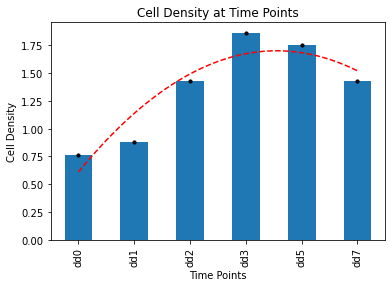

In [6]:
import numpy as np
import matplotlib.pyplot as plt


def bar_plot(regex, model, data_name, show_parabola, last_word):
    # calculate averages and plot bar chart
    cols = model.filter(regex=rf"{regex}")
    averages = cols.mean()

    fig, ax = plt.subplots()
    averages.plot(kind='bar', x=averages.index, y=averages.values, ax=ax)

    # plot a dot at the top middle of each bar
    for i, v in enumerate(averages.values):
        ax.scatter(i, v, s=10, color='k')

    if last_word:
        ax.set_xticklabels([col.split()[-1] for col in cols])
    else:
        ax.set_xticklabels([col.split(' ', 1)[0] for col in cols])

    if show_parabola:
        # fit a second-order polynomial to the data points
        x = np.array(range(len(averages)))
        y = averages.values
        p = np.polyfit(x, y, 2)

        # plot the parabola using the fitted coefficients
        x_fit = np.linspace(0, len(averages) - 1, 100)
        y_fit = np.polyval(p, x_fit)
        ax.plot(x_fit, y_fit, 'r--')

    plt.xlabel('Time Points')
    plt.ylabel(data_name)
    plt.title(data_name + ' at Time Points')

bar_plot('^dd[\d] Cell Density$', X_train, 'Cell Density', True, False)

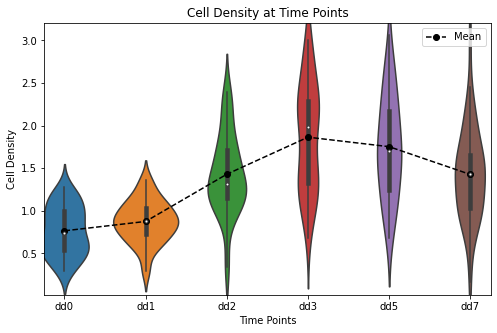

In [7]:
import seaborn as sns
# NOTE: We know the relation with Cell Density on ddX is non-linear (increases generally between 1-3 then decreases generally between 5-7)

cols = X_train.filter(regex=r'^dd[\d] Cell Density$')
means = cols.mean()

# create combined violin/box plot
fig, ax = plt.subplots(figsize=(8, 5))
sns.violinplot(data=cols, inner='box', ax=ax)

# set x-axis tick labels
ax.set_xticklabels([col.split(' ', 1)[0] for col in cols])

# add line connecting mean values of each column
ax.plot(means.index, means.values, marker='o', linestyle='--', color='black', label='Mean')

# add legend
ax.legend()

# add axis labels and title
plt.xlabel('Time Points')
plt.ylabel('Cell Density')
plt.title('Cell Density at Time Points')

plt.show()

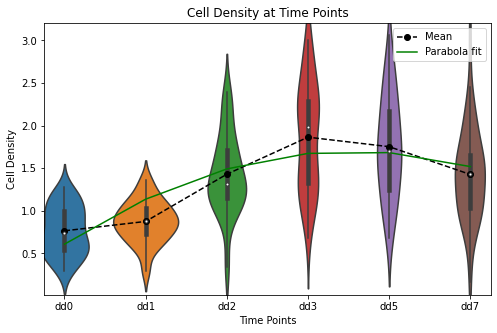

In [8]:
# NOTE: We discover that relation with Cell Density on ddX is non-linear (increases generally between 1-3 then decreases generally between 5-7)

import seaborn as sns

# regex_skew_list: 0, 1, 2, 3, 5, 7
# regex_normal_list: 0, 1, 2, 3, 4, 5, 6, 7

def violin_plot(regex, model, data_name, show_parabola, last_word):
    cols = model.filter(regex=rf"{regex}")
    means = cols.mean()

    # create combined violin/box plot
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.violinplot(data=cols, inner='box', ax=ax)

    # set x-axis tick labels
    if last_word:
        ax.set_xticklabels([col.split()[-1] for col in cols])
    else:
        ax.set_xticklabels([col.split(' ', 1)[0] for col in cols])

    # add line connecting mean values of each column
    ax.plot(means.index, means.values, marker='o', linestyle='--', color='black', label='Mean')

    if show_parabola:
        # calculate coefficients of the second-degree polynomial that fits the mean values
        x = np.arange(len(means))
        poly_coeffs = np.polyfit(x, means, 2)
        # create a polynomial function from the coefficients
        poly_func = np.poly1d(poly_coeffs)
        ax.plot(x, poly_func(x), color='green', label='Parabola fit')

    # add legend
    ax.legend()

    # add axis labels and title
    plt.xlabel('Time Points')
    plt.ylabel(data_name)
    plt.title(data_name + ' at Time Points')

    #plt.show()

violin_plot('^dd[\d] Cell Density$', X_train, 'Cell Density', True, False)
plt.show()

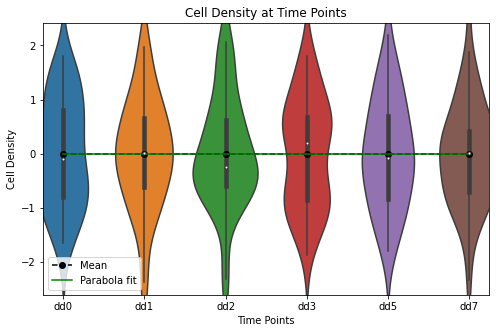

In [9]:
# Normalized
violin_plot('^dd[\d] Cell Density$', (X_train-X_train.mean())/X_train.std(), 'Cell Density', True, False)

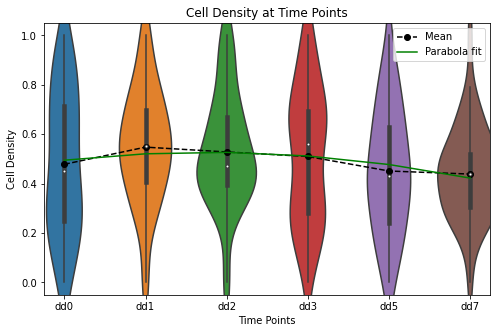

In [10]:
# Min-max normalized
violin_plot('^dd[\d] Cell Density$', (X_train-X_train.min())/(X_train.max()-X_train.min()), 'Cell Density', True, False)

In [11]:
# interpolate missing values using linear interpolation
#X_train_completed = X_train.filter(regex=r'^dd[\d] Cell Density$').copy()
#X_train_completed = X_train_completed.reindex(sorted(X_train_completed.columns), axis=1)  # sort columns by name
#X_train_completed = X_train_completed.apply(lambda row: row.interpolate(method='linear', limit_direction='both'), axis=1)

# add columns dd4 and dd6 using parabolic interpolation
#x = np.array([0, 1, 2, 3, 5, 7])
#y = np.array(X_train_completed.mean(axis=0))
#f = np.polyfit(x, y, 2)

#X_train_completed['dd4 Cell Density'] = np.polyval(f, 4)
#X_train_completed['dd6 Cell Density'] = np.polyval(f, 6)

# sort columns by name
#X_train_completed = X_train_completed.reindex(sorted(X_train_completed.columns), axis=1)

In [12]:
#violin_plot('^dd[\d] Cell Density$', X_train_completed, 'Cell Density', True, False)

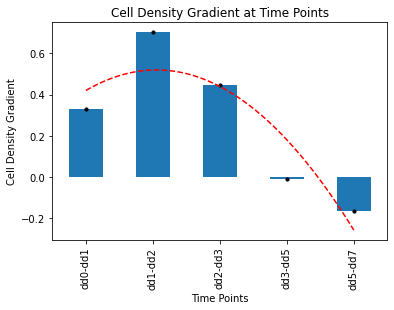

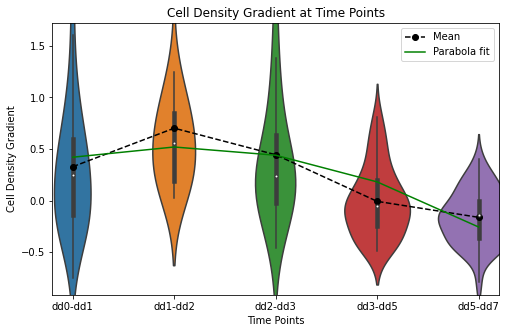

In [13]:
def plot_both(regex, model, data_name, show_parabola, last_word):
    bar_plot(regex, X_train, data_name, show_parabola, last_word)
    violin_plot(regex, X_train, data_name, show_parabola, last_word)
    plt.show()

plot_both('^dd[\d]-dd[\d] Cell Density Gradient$', X_train, 'Cell Density Gradient', True, False)

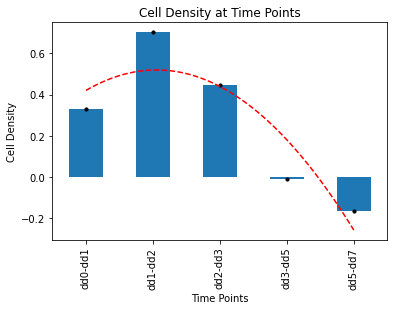

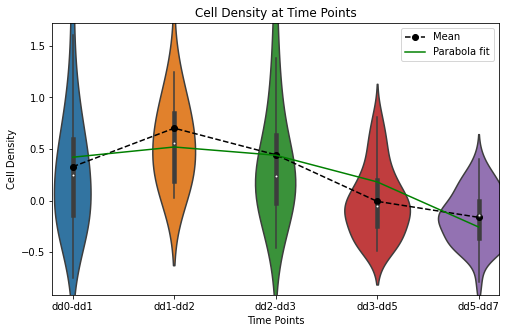

In [14]:
plot_both('^dd[\d]-dd[\d] Cell Density Gradient$', X_train, 'Cell Density', True, False)

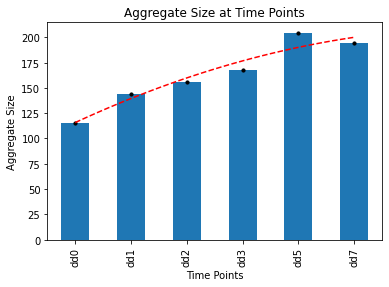

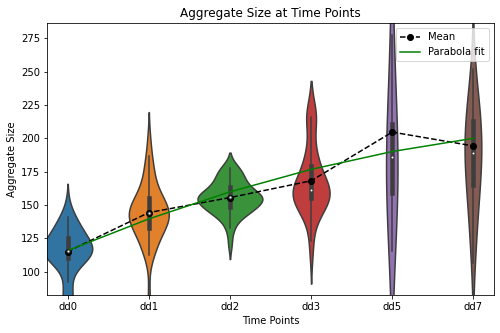

In [15]:
plot_both('^dd[\d] Aggregate Size$', X_train, 'Aggregate Size', True, False)

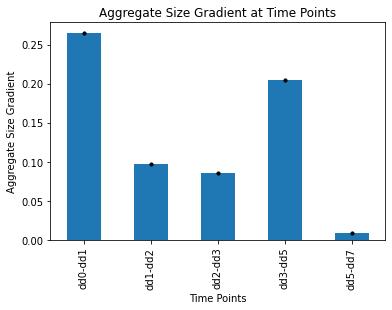

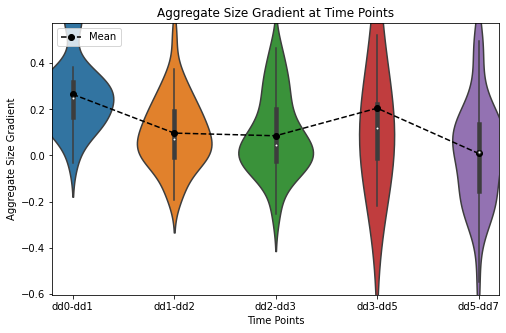

In [16]:
plot_both('^dd[\d]-dd[\d] Aggregate Size Gradient$', X_train, 'Aggregate Size Gradient', False, False)

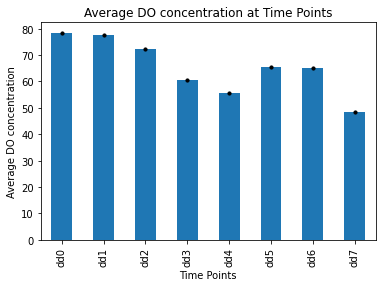

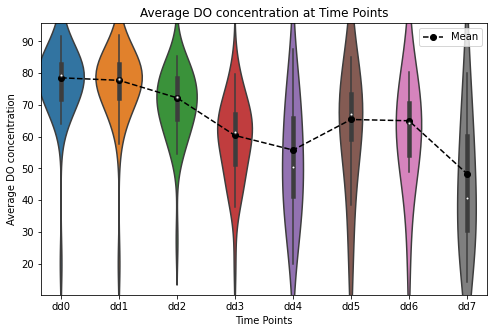

In [17]:
plot_both('^Average DO concentration dd[\d]$', X_train, 'Average DO concentration', False, True)

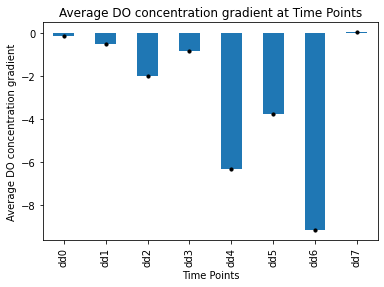

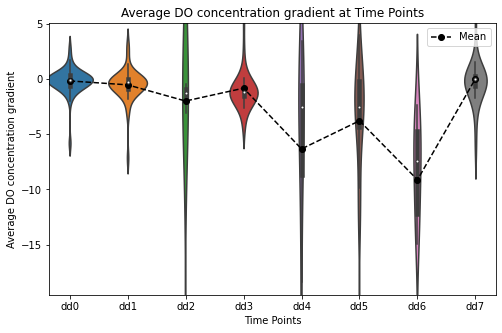

In [18]:
plot_both('^Average DO concentration gradient dd[\d]$', X_train, 'Average DO concentration gradient', False, True)

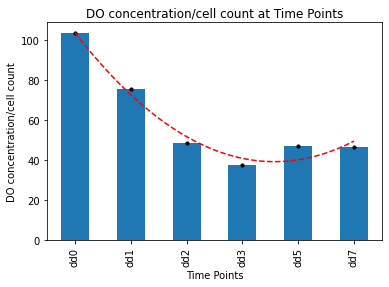

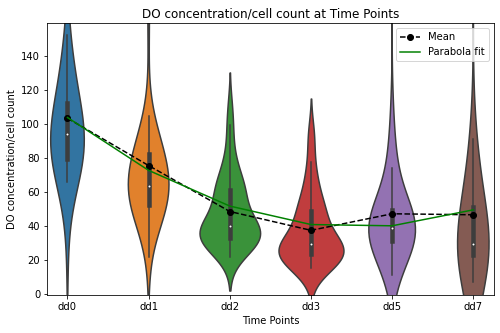

In [19]:
plot_both('^DO concentration/cell count dd[\d]$', X_train, 'DO concentration/cell count', True, True)

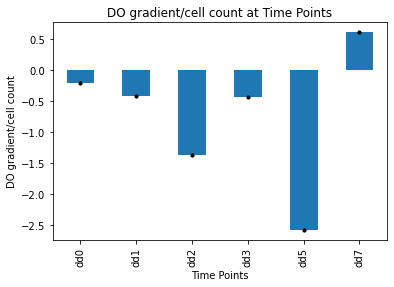

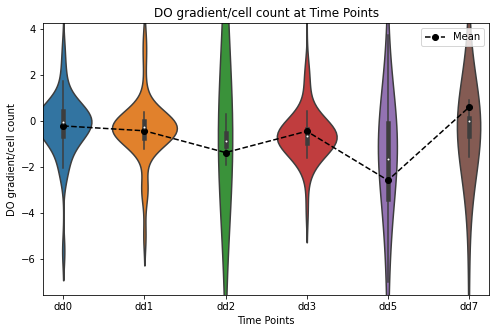

In [20]:
plot_both('^DO gradient/cell count dd[\d]$', X_train, 'DO gradient/cell count', False, True)

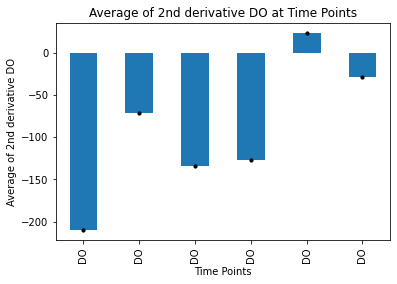

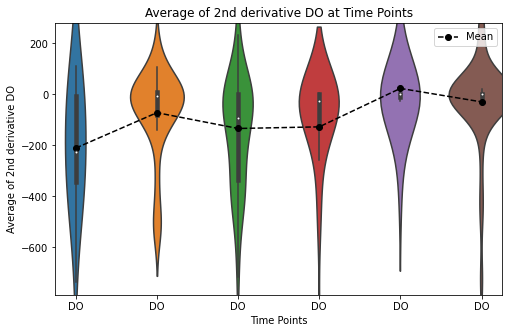

In [21]:
plot_both('^dd[\d] Average of 2nd derivative DO$', X_train, 'Average of 2nd derivative DO', False, True)

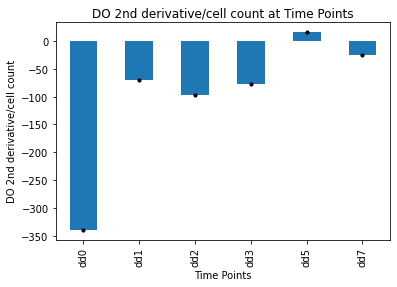

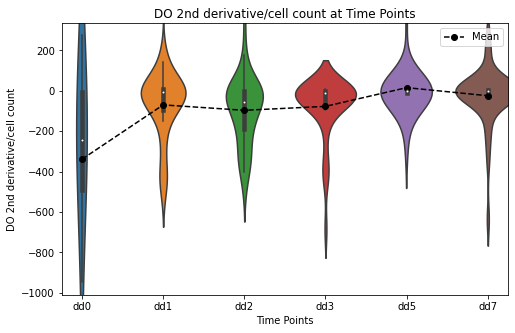

In [22]:
plot_both('^dd[\d] DO 2nd derivative/cell count$', X_train, 'DO 2nd derivative/cell count', False, False)

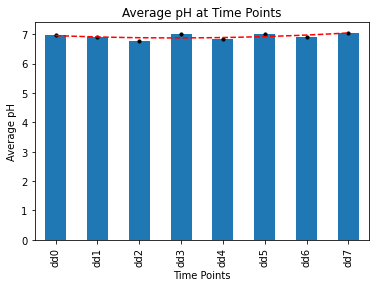

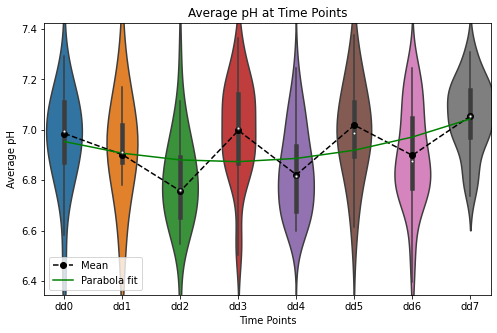

In [23]:
plot_both('^dd[\d] Average pH$', X_train, 'Average pH', True, False)

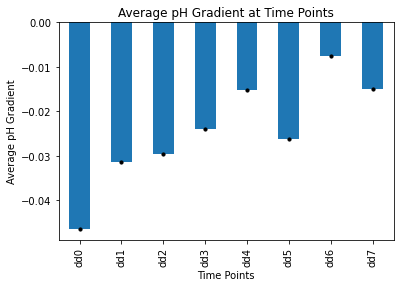

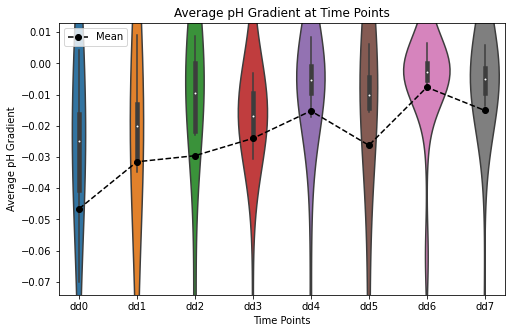

In [24]:
plot_both('^dd[\d] Average pH Gradient$', X_train, 'Average pH Gradient', False, False)

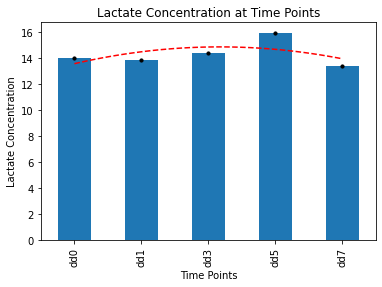

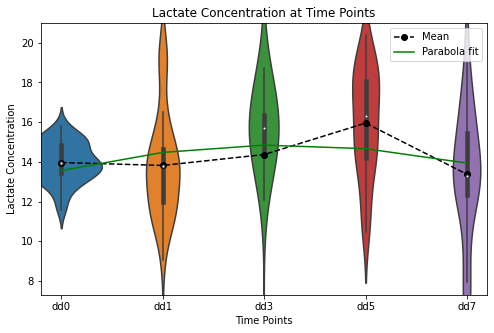

In [25]:
plot_both('^dd[\d] Lactate Concentration$', X_train, 'Lactate Concentration', True, False)

Let's start by making time series, using ddX values + known averages. (TODO make it for X_test too)

IMPORTANT NOTE: While we might not create new data if the range of dates is note skewed, since parts of it is, this might make the dataset more meaningful.


In [26]:
df = X_train.copy()

skewed_ranges = [0,1,2,3,5,7]

comparison_df = df.filter(regex='^dd[\d] Cell Density$').copy()

for i in range(len(skewed_ranges)-1):
    time_point1 = f"dd{skewed_ranges[i]}"
    time_point2 = f"dd{skewed_ranges[i+1]}"
    col_name = f"{time_point1}-{time_point2} Cell Density Rate of Change"
    rate_of_change = (df[f"{time_point2} Cell Density"] - df[f"{time_point1} Cell Density"]) / (int(time_point2[2:]) - int(time_point1[2:]))
    df[col_name] = rate_of_change
    comparison_df[col_name] = rate_of_change

# drop the original cell density and cell density gradient columns
df.drop(list(df.filter(regex = '^dd[\d] Cell Density$')), axis = 1, inplace = True)

print(comparison_df.columns)

Index(['dd0 Cell Density', 'dd1 Cell Density', 'dd2 Cell Density',
       'dd3 Cell Density', 'dd5 Cell Density', 'dd7 Cell Density',
       'dd0-dd1 Cell Density Rate of Change',
       'dd1-dd2 Cell Density Rate of Change',
       'dd2-dd3 Cell Density Rate of Change',
       'dd3-dd5 Cell Density Rate of Change',
       'dd5-dd7 Cell Density Rate of Change'],
      dtype='object')


In [27]:
def add_metrics(col_name_regex, col_name, col_start, col_end, df):
    filtered_df = df.filter(regex=col_name_regex).copy()
    new_df = pd.DataFrame()
    new_df[f'{col_name} max'] = filtered_df.apply(max, axis=1)
    new_df[f'{col_name} min'] = filtered_df.apply(min, axis=1)
    new_df[f'{col_name} mean'] = filtered_df.mean(axis=1)
    new_df[f'{col_name} std'] = filtered_df.std(axis=1)
    new_df[f'{col_name} final diff'] = filtered_df[col_end] - filtered_df[col_start]
    return new_df

In [28]:
enhanced_df = X_train.copy()

columns_data = [
    ('^dd[\d] Cell Density$', 'Cell Density', 'dd0 Cell Density', 'dd7 Cell Density'),
    ('^dd[\d]-dd[\d] Cell Density Gradient$', 'Cell Density Gradient', 'dd0-dd1 Cell Density Gradient', 'dd5-dd7 Cell Density Gradient'),
    ('^dd[\d] Aggregate Size$', 'Aggregate Size', 'dd0 Aggregate Size', 'dd7 Aggregate Size'),
    ('^dd[\d]-dd[\d] Aggregate Size Gradient$', 'Aggregate Size Gradient', 'dd0-dd1 Aggregate Size Gradient', 'dd5-dd7 Aggregate Size Gradient'),
    ('^Average DO concentration dd[\d]$', 'Average DO concentration', 'Average DO concentration dd0', 'Average DO concentration dd7'),
    ('^Average DO concentration gradient dd[\d]$', 'Average DO concentration gradient', 'Average DO concentration gradient dd0', 'Average DO concentration gradient dd7'),
    ('^DO concentration/cell count dd[\d]$', 'DO concentration/cell count', 'DO concentration/cell count dd0', 'DO concentration/cell count dd7'),
    ('^DO gradient/cell count dd[\d]$', 'DO gradient/cell count', 'DO gradient/cell count dd0', 'DO gradient/cell count dd7'),
    ('^dd[\d] Average of 2nd derivative DO$', 'Average of 2nd derivative DO', 'dd0 Average of 2nd derivative DO', 'dd7 Average of 2nd derivative DO'),
    ('^dd[\d] DO 2nd derivative/cell count$', 'DO 2nd derivative/cell count', 'dd0 DO 2nd derivative/cell count', 'dd7 DO 2nd derivative/cell count'),
    ('^dd[\d] Average pH$', 'Average pH', 'dd0 Average pH', 'dd7 Average pH'),
    ('^dd[\d] Average pH Gradient$', 'Average pH Gradient', 'dd0 Average pH Gradient', 'dd7 Average pH Gradient'),
    ('^dd[\d] Lactate Concentration$', 'Lactate Concentration', 'dd0 Lactate Concentration', 'dd7 Lactate Concentration'),
    ('^dd[\d] Glucose Concentration$', 'Glucose Concentration', 'dd0 Glucose Concentration', 'dd7 Glucose Concentration'),
]

for col_name_regex, col_name, col_start, col_end in columns_data:
    new_cols = add_metrics(col_name_regex, col_name, col_start, col_end, X_train)
    enhanced_df = pd.concat([enhanced_df, new_cols], axis=1)

enhanced_df.columns

Index(['dd0 Cell Density', 'dd0-dd1 Cell Density Gradient', 'dd1 Cell Density',
       'dd1-dd2 Cell Density Gradient', 'dd2 Cell Density',
       'dd2-dd3 Cell Density Gradient', 'dd3 Cell Density',
       'dd3-dd5 Cell Density Gradient', 'dd5 Cell Density',
       'dd5-dd7 Cell Density Gradient',
       ...
       'Lactate Concentration max', 'Lactate Concentration min',
       'Lactate Concentration mean', 'Lactate Concentration std',
       'Lactate Concentration final diff', 'Glucose Concentration max',
       'Glucose Concentration min', 'Glucose Concentration mean',
       'Glucose Concentration std', 'Glucose Concentration final diff'],
      dtype='object', length=172)

In [29]:
# Initialize list to store wave parameters

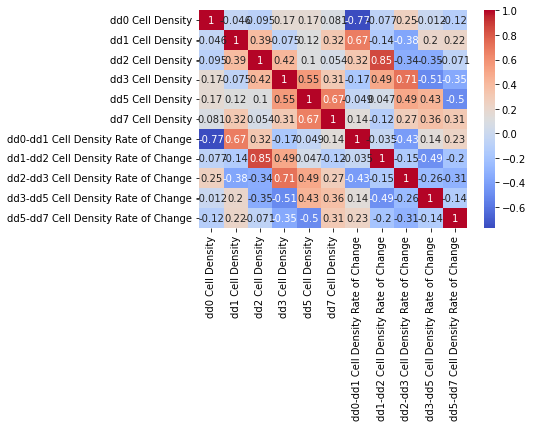

In [30]:
corr_matrix = comparison_df.corr()

# plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# display the plot
plt.show()

We can observe that the newly generated columns do not seem to be strongly correlated to the raw data.

In [31]:
list(df.columns)

['dd0-dd1 Cell Density Gradient',
 'dd1-dd2 Cell Density Gradient',
 'dd2-dd3 Cell Density Gradient',
 'dd3-dd5 Cell Density Gradient',
 'dd5-dd7 Cell Density Gradient',
 'dd0 Aggregate Size',
 'dd0-dd1 Aggregate Size Gradient',
 'dd1 Aggregate Size',
 'dd1-dd2 Aggregate Size Gradient',
 'dd2 Aggregate Size',
 'dd2-dd3 Aggregate Size Gradient',
 'dd3 Aggregate Size',
 'dd3-dd5 Aggregate Size Gradient',
 'dd5 Aggregate Size',
 'dd7 Aggregate Size',
 'dd5-dd7 Aggregate Size Gradient',
 'Preculture Time [h]',
 'Start Preculture Perfusion [h after inoc] d1-d2',
 'Presence of  IWP2 [h]',
 'Average DO concentration d0',
 'Average DO concentration d1',
 'Average DO concentration dd0',
 'Average DO concentration dd1',
 'Average DO concentration dd2',
 'Average DO concentration dd3',
 'Average DO concentration dd4',
 'Average DO concentration dd5',
 'Average DO concentration dd6',
 'Average DO concentration dd7',
 'Average DO concentration gradient d0',
 'Average DO concentration gradient d1',


By create a model that can handle logical relation between columns (ex. dd3 is after dd1 and before dd5) instead of considering them as independant

Time series andn such

Also if so, we could separate timely features from non timely features and combine the predictions in a meta-model

TODO: PCA/Graphs, on each of these new datasets

As the features are non-linear, these techniques could help:

- **Polynomial features**: One common approach is to create polynomial features by raising existing features to a power. For example, if you have a feature x, you could create a new feature x^2 to capture the quadratic relationship between x and the target variable. You can use scikit-learn's PolynomialFeatures class to create polynomial features.
- **Interaction features**: Another way to capture non-linear relationships is to create interaction features by multiplying two or more existing features together. For example, if you have two features x and y, you could create a new feature x*y to capture the interaction between x and y.
- T**ransformations**: We can also apply mathematical transformations to the features to capture non-linear relationships. For example, you could take the logarithm or square root of a feature to compress its range and capture non-linear relationships.
- **Binning**: We can group the continuous features into bins or categories to create discrete features. This is often useful when you want to capture non-linear relationships between a feature and the target variable, but the relationship is not strictly monotonic.

RULES: The initial selection stage requires a brief abstract of no more than 200 words and a short video of no more than 1 minute. The abstract should contain essential information that justifies the team's approach and explains their solution. The video should feature an oral description of the team's primary outcomes, as well as a screen-recorded "demo run" of their code on a randomly sampled subset of the data (for more information, refer to the challenges PDF). During the final presentation stage, each team will be given 5-6 minutes to present their solution, followed by 3-4 minutes allocated for questions from the judges (10 minutes total). 

---

# Description

Human cardiomyocytes have potential for use in therapeutic cell therapy and high-throughput drug screening. As part of a prediction of human induced pluripotent stem cell cardiac differentiation outcome (sufficient VS insufficient), we developed a machine learning model.

In this approach, contrary to the reference article (https://www.frontiersin.org/articles/10.3389/fbioe.2020.00851/full), we do not separate the dataset in a split of "up to dd7" and "up to dd5". Let's try a different approach! Instead, we add inferred data to the dataset and remove the initial raw data to improve its performance by manipulating its complexity. We only used the summary statistics of the 7 days to simplify the dataset. Engaging in data exploration, including bar and violin plots, we know the sample size is small & variance is high plus the dataset contains non-linear data with missing interpolation. For that reason, we engage in the use SMOTETomek and a combination of classifiers such as RandomForestClassifier, LogisticRegressor, KNN and GradientBoostClassifier with a Randomized Search (with cross-validations) to optimise hyperparamaters.

We also have a work-in-progress building the domain knowledge to reduce the initial dataset, as there is a presence of waves, before starting an improved feature selection!

Our final custom performance is:

Accuracy :  0.8333
Precision :  0.7500
Recall :  0.6000
MCC :  0.5635

# 2) Machine Learning

In [76]:
import pandas as pd
import numpy as np
from scipy.stats import randint

# Normalize or scale the data
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor

In [77]:
ROOT_PATH = "/data/notebook_files/"
X_train = pd.read_excel(ROOT_PATH + 'train_data.xlsx', sheet_name=0)
y_train = pd.read_excel(ROOT_PATH + 'train_data.xlsx', sheet_name=1)

X_test = pd.read_excel(ROOT_PATH + 'test_data_corrected.xlsx', sheet_name=0)
y_test = pd.read_excel(ROOT_PATH + 'test_data_corrected.xlsx', sheet_name=1)

X_train.columns = X_train.columns.str.rstrip()
X_test.columns = X_test.columns.str.rstrip()

In [78]:
def add_metrics(col_name_regex, col_name, col_start, col_end, df):
    filtered_df = df.filter(regex=col_name_regex).copy()
    new_df = pd.DataFrame()
    new_df[f'{col_name} max'] = filtered_df.apply(max, axis=1)
    new_df[f'{col_name} min'] = filtered_df.apply(min, axis=1)
    new_df[f'{col_name} mean'] = filtered_df.mean(axis=1)
    new_df[f'{col_name} std'] = filtered_df.std(axis=1)
    new_df[f'{col_name} final diff'] = filtered_df[col_end] - filtered_df[col_start]
    return new_df

In [79]:
enhanced_df = pd.DataFrame()
enhanced_df_test = pd.DataFrame()
columns_data = [
    ('^dd[\d] Cell Density$', 'Cell Density', 'dd0 Cell Density', 'dd7 Cell Density'),
    ('^dd[\d]-dd[\d] Cell Density Gradient$', 'Cell Density Gradient', 'dd0-dd1 Cell Density Gradient', 'dd5-dd7 Cell Density Gradient'),
    ('^dd[\d] Aggregate Size$', 'Aggregate Size', 'dd0 Aggregate Size', 'dd7 Aggregate Size'),
    ('^dd[\d]-dd[\d] Aggregate Size Gradient$', 'Aggregate Size Gradient', 'dd0-dd1 Aggregate Size Gradient', 'dd5-dd7 Aggregate Size Gradient'),
    ('^Average DO concentration dd[\d]$', 'Average DO concentration', 'Average DO concentration dd0', 'Average DO concentration dd7'),
    ('^Average DO concentration gradient dd[\d]$', 'Average DO concentration gradient', 'Average DO concentration gradient dd0', 'Average DO concentration gradient dd7'),
    ('^DO concentration/cell count dd[\d]$', 'DO concentration/cell count', 'DO concentration/cell count dd0', 'DO concentration/cell count dd7'),
    ('^DO gradient/cell count dd[\d]$', 'DO gradient/cell count', 'DO gradient/cell count dd0', 'DO gradient/cell count dd7'),
    ('^dd[\d] Average of 2nd derivative DO$', 'Average of 2nd derivative DO', 'dd0 Average of 2nd derivative DO', 'dd7 Average of 2nd derivative DO'),
    ('^dd[\d] DO 2nd derivative/cell count$', 'DO 2nd derivative/cell count', 'dd0 DO 2nd derivative/cell count', 'dd7 DO 2nd derivative/cell count'),
    ('^dd[\d] Average pH$', 'Average pH', 'dd0 Average pH', 'dd7 Average pH'),
    ('^dd[\d] Average pH Gradient$', 'Average pH Gradient', 'dd0 Average pH Gradient', 'dd7 Average pH Gradient'),
    ('^dd[\d] Lactate Concentration$', 'Lactate Concentration', 'dd0 Lactate Concentration', 'dd7 Lactate Concentration'),
    ('^dd[\d] Glucose Concentration$', 'Glucose Concentration', 'dd0 Glucose Concentration', 'dd7 Glucose Concentration'),
]

for col_name_regex, col_name, col_start, col_end in columns_data:
    new_cols = add_metrics(col_name_regex, col_name, col_start, col_end, X_train)
    new_cols_test = add_metrics(col_name_regex, col_name, col_start, col_end, X_test)

    enhanced_df = pd.concat([enhanced_df, new_cols], axis=1)
    enhanced_df_test = pd.concat([enhanced_df_test, new_cols_test], axis=1)

X_train = enhanced_df.copy()
X_test = enhanced_df_test.copy()

In [80]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.base import TransformerMixin
# from sklearn.decomposition import PCA
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import RBF, WhiteKernel
# from sklearn.feature_selection import SelectKBest, f_regression


# y_train_temp = y_train.to_numpy().ravel() / 100
# y_test_temp = y_test.to_numpy().ravel() / 100

# class TreeTransformer(TransformerMixin):
#     def __init__(self, estimator):
#         self.estimator = estimator

#     def fit(self, X, y):
#         self.estimator.fit(X, y)
#         return self

#     def transform(self, X):
#         return X


# pca = PCA(n_components=0.95)
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.transform(X_test)

# # Fit a MARS model and find the features importances 
# model = make_pipeline(TreeTransformer(DecisionTreeRegressor(max_depth=3)), LinearRegression())
# model.fit(X_train_pca, y_train_temp)

# importance_mars_pca = model.named_steps['treetransformer'].estimator.feature_importances_
# importance_mars = np.matmul(importance_mars_pca, np.abs(pca.components_)) # (NOT SURE)

# # fit a RandomForestRegressor and find the features importances
# model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
# model_rf.fit(X_train, y_train_temp)
# importance_rf = model_rf.feature_importances_

# choosen_quantile = 0.6
# # SelectKBest feature selection
# select = SelectKBest(f_regression, k=int((1-choosen_quantile)*X_train.shape[1]))
# select.fit(X_train, y_train_temp)
# indices = select.get_support(indices=True)
# important_features_selectK = np.zeros(X_train.shape[1])
# np.put(important_features_selectK, indices, 1)
# important_features_selectK = important_features_selectK.astype(int)

# # decide on which features to use
# select_mars = np.where(importance_mars >= np.quantile(importance_mars, choosen_quantile), 1, 0)
# select_rf = np.where(importance_rf >= np.quantile(importance_rf, choosen_quantile), 1, 0)

# selected_features = select_mars | select_rf
# selected_features = selected_features | important_features_selectK
# selected_features = np.where(selected_features, True, False)

# X_train = X_train[:, selected_features]
# X_test = X_test[:, selected_features]

In [81]:
y_train = (y_train >= 90).to_numpy().ravel()
y_test = (y_test >= 90).to_numpy().ravel()

In [82]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

sme = SMOTETomek(random_state=42)

X_train, y_train = sme.fit_resample(X_train, y_train)

In [83]:
import pickle as pkl
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb

RF_Classifier = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=6, n_estimators = 200)
RF_Classifier.fit(X_train, y_train)
y_pred = RF_Classifier.predict(X_test)


print("RF_Classifier")
print(RF_Classifier.fit(X_train, y_train).score(X_test, y_test))

XGB_Classifier = XGBClassifier(random_state=42,n_jobs=-1,max_depth=7,n_estimators = 200)
print("XGB_Classifier")
print(XGB_Classifier.fit(X_train, y_train).score(X_test, y_test))


LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=42)
print("LGR_Classifier")
print(LGR_Classifier.fit(X_train, y_train).score(X_test, y_test))

KNN_Classifier =  KNeighborsClassifier()
print("KNN_Classifier")
print(KNN_Classifier.fit(X_train, y_train).score(X_test, y_test))

RF_Classifier
0.8333333333333334
XGB_Classifier
[16:16:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7222222222222222
LGR_Classifier
0.4444444444444444
KNN_Classifier
0.2222222222222222


/opt/python/envs/default/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [88]:
import pickle as pkl
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import StackingClassifier

# LGB_Classifier = lgb.LGBMClassifier(max_depth=0)
#LGB_Classifier.fit(X_train, y_train)


RF_Classifier = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=6, n_estimators = 200)
#RF_Classifier.fit(X_train, y_train)


XGB_Classifier = XGBClassifier(random_state=42,n_jobs=-1,max_depth=7,n_estimators = 200)
#XGB_Classifier.fit(X_train, y_train)


LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=42)
#LGR_Classifier.fit(X_train, y_train)

KNN_Classifier =  KNeighborsClassifier()

# estimators = [LGR_Classifier,XGB_Classifier,RF_Classifier,KNN_Classifier]
estimators = [('logistic', LGR_Classifier), ('xgb', XGB_Classifier), ('rf', RF_Classifier), ('knn', KNN_Classifier)]


clff = StackingClassifier(estimators=estimators, final_estimator=lgb.LGBMClassifier())
param_dist = {'rf__max_depth': randint(1, 20),
              'rf__n_estimators': randint(50, 500),
              'xgb__max_depth': randint(1, 20),
              'xgb__n_estimators': randint(50, 500),
              'knn__n_neighbors': randint(1, 20),
           }
random_search = RandomizedSearchCV(estimator=clff, param_distributions=param_dist, cv=5, n_iter=1, n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)



[16:18:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:18:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:18:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:18:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/python/envs/default/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/python/envs/default/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/python/envs/default/lib/python3.8/site-packages/xgboost/sklearn.py:

RandomizedSearchCV(cv=5,
 estimator=StackingClassifier(estimators=[('logistic',
 LogisticRegression(n_jobs=-1,
 random_state=42)),
 ('xgb',
 XGBClassifier(base_score=None,
 booster=None,
 colsample_bylevel=None,
 colsample_bynode=None,
 colsample_bytree=None,
 enable_categorical=False,
 gamma=None,
 gpu_id=None,
 importance_type=None,
 interaction_constraints=None,
 learning_ra...
 'rf__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fd9b56058b0>,
 'rf__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fd9b5352a90>,
 'xgb__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fd9b4d9d130>,
 'xgb__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fd9b4dbf040>},
 random_state=42) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. RandomizedSearchCV RandomizedSearchCV(cv=5,
 estimator=StackingClassifier(estimators=[('logistic',
 LogisticRegression(n_jobs=-1,
 random_state=42)),
 ('xgb',
 XGBClassifier(base_score=None,
 booster=None,
 colsample_bylevel=None,
 colsample_bynode=None,
 colsample_bytree=None,
 enable_categorical=False,
 gamma=None,
 gpu_id=None,
 importance_type=None,
 interaction_constraints=None,
 learning_ra...
 'rf__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fd9b56058b0>,
 'rf__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fd9b5352a90>,
 'xgb__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fd9b4d9d130>,
 'xgb__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fd9b4dbf040>},
 random_state=42) estimator: StackingClassifier StackingClassifier(estimators=[('logistic',
 LogisticRegression(n_jobs=-1, random_state=42)),
 ('xgb',
 XGBClassifier(base_score=None, booster=None,
 colsample_bylevel=None,
 colsample_bynode=None,
 colsample_bytree=None,
 enable_categorical=False,
 gamma=None, gpu_id=None,
 importance_type=None,
 interaction_constraints=None,
 learning_rate=None,
 max_delta_step=None, max_de...
 n_estimators=200, n_jobs=-1,
 num_parallel_tree=None,
 predictor=None, random_state=42,
 reg_alpha=None, reg_lambda=None,
 scale_pos_weight=None,
 subsample=None, tree_method=None,
 validate_parameters=None,
 verbosity=None)),
 ('rf',
 RandomForestClassifier(max_depth=6,
 n_estimators=200,
 n_jobs=-1,
 random_state=42)),
 ('knn', KNeighborsClassifier())],
 final_estimator=LGBMClassifier()) logistic LogisticRegression LogisticRegression(n_jobs=-1, random_state=42) xgb XGBClassifier XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
 colsample_bynode=None, colsample_bytree=None,
 enable_categorical=False, gamma=None, gpu_id=None,
 importance_type=None, interaction_constraints=None,
 learning_rate=None, max_delta_step=None, max_depth=7,
 min_child_weight=None, missing=nan, monotone_constraints=None,
 n_estimators=200, n_jobs=-1, num_parallel_tree=None,
 predictor=None, random_state=42, reg_alpha=None, reg_lambda=None,
 scale_pos_weight=None, subsample=None, tree_method=None,
 validate_parameters=None, verbosity=None) rf RandomForestClassifier RandomForestClassifier(max_depth=6, n_estimators=200, n_jobs=-1,
 random_state=42) knn KNeighborsClassifier KNeighborsClassifier() final_estimator LGBMClassifier LGBMClassifier()

In [89]:
random_search.best_params_

{'knn__n_neighbors': 7,
 'rf__max_depth': 15,
 'rf__n_estimators': 156,
 'xgb__max_depth': 8,
 'xgb__n_estimators': 238}

In [90]:
# Result of grid search of n_iter = 500

best_params = random_search.best_params_
    
#         {'knn__n_neighbors': 9,
#  'rf__max_depth': 2,
#  'rf__n_estimators': 102,
#  'xgb__max_depth': 12,
#  'xgb__n_estimators': 404}

In [91]:
RF_Classifier = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=best_params['rf__max_depth'], n_estimators = best_params['rf__n_estimators'])
#RF_Classifier.fit(X_train, y_train)


XGB_Classifier = XGBClassifier(random_state=42,n_jobs=-1,max_depth=best_params['xgb__max_depth'],n_estimators = best_params['xgb__n_estimators'])
#XGB_Classifier.fit(X_train, y_train)


LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=42)
#LGR_Classifier.fit(X_train, y_train)

KNN_Classifier =  KNeighborsClassifier(n_neighbors=best_params['knn__n_neighbors'])

# estimators = [LGR_Classifier,XGB_Classifier,RF_Classifier,KNN_Classifier]
estimators = [('logistic', LGR_Classifier), ('xgb', XGB_Classifier), ('rf', RF_Classifier), ('knn', KNN_Classifier)]


clff = StackingClassifier(estimators=estimators, final_estimator=lgb.LGBMClassifier())
clff.fit(X_train, y_train)
y_pred = clff.predict(X_test)

[16:18:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:18:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:18:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:18:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/python/envs/default/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/python/envs/default/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/python/envs/default/lib/python3.8/site-packages/xgboost/sklearn.py:

In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, matthews_corrcoef


# results
# Accuracy
print('Accuracy : ', accuracy_score(y_test, y_pred))

# Precision
print('Precision : ', precision_score(y_test, y_pred))

# Recall
print('Recall : ', recall_score(y_test, y_pred))

# MCC
print('MCC : ', matthews_corrcoef(y_test, y_pred))

Accuracy :  0.7222222222222222
Precision :  0.5
Recall :  0.2
MCC :  0.17541160386140586


# 3) Demo run

## Demo run

In [ ]:
# demo run

# read the testing data
X_test = pd.read_excel(ROOT_PATH + "test_data_corrected.xlsx", sheet_name=0)
y_test = pd.read_excel(ROOT_PATH + "test_data_corrected.xlsx", sheet_name=1)

# define the number of demo samples
N = 10

# create an array of indices for the test dataset
test_indices = np.arange(len(X_test))

# shuffle the array of indices
np.random.shuffle(test_indices)

# use the first N elements of the shuffled array to create the demo dataset
demo_indices = test_indices[:N]
X_demo = X_test.iloc[demo_indices]
y_demo = y_test.iloc[demo_indices]

In [ ]:
enhanced_df_demo = pd.DataFrame()
columns_data = [
    ('^dd[\d] Cell Density$', 'Cell Density', 'dd0 Cell Density', 'dd7 Cell Density'),
    ('^dd[\d]-dd[\d] Cell Density Gradient$', 'Cell Density Gradient', 'dd0-dd1 Cell Density Gradient', 'dd5-dd7 Cell Density Gradient'),
    ('^dd[\d] Aggregate Size$', 'Aggregate Size', 'dd0 Aggregate Size', 'dd7 Aggregate Size'),
    ('^dd[\d]-dd[\d] Aggregate Size Gradient$', 'Aggregate Size Gradient', 'dd0-dd1 Aggregate Size Gradient', 'dd5-dd7 Aggregate Size Gradient'),
    ('^Average DO concentration dd[\d]$', 'Average DO concentration', 'Average DO concentration dd0', 'Average DO concentration dd7'),
    ('^Average DO concentration gradient dd[\d]$', 'Average DO concentration gradient', 'Average DO concentration gradient dd0', 'Average DO concentration gradient dd7'),
    ('^DO concentration/cell count dd[\d]$', 'DO concentration/cell count', 'DO concentration/cell count dd0', 'DO concentration/cell count dd7'),
    ('^DO gradient/cell count dd[\d]$', 'DO gradient/cell count', 'DO gradient/cell count dd0', 'DO gradient/cell count dd7'),
    ('^dd[\d] Average of 2nd derivative DO$', 'Average of 2nd derivative DO', 'dd0 Average of 2nd derivative DO', 'dd7 Average of 2nd derivative DO'),
    ('^dd[\d] DO 2nd derivative/cell count$', 'DO 2nd derivative/cell count', 'dd0 DO 2nd derivative/cell count', 'dd7 DO 2nd derivative/cell count'),
    ('^dd[\d] Average pH$', 'Average pH', 'dd0 Average pH', 'dd7 Average pH'),
    ('^dd[\d] Average pH Gradient$', 'Average pH Gradient', 'dd0 Average pH Gradient', 'dd7 Average pH Gradient'),
    ('^dd[\d] Lactate Concentration$', 'Lactate Concentration', 'dd0 Lactate Concentration', 'dd7 Lactate Concentration'),
    ('^dd[\d] Glucose Concentration$', 'Glucose Concentration', 'dd0 Glucose Concentration', 'dd7 Glucose Concentration'),
]

for col_name_regex, col_name, col_start, col_end in columns_data:
    new_cols = add_metrics(col_name_regex, col_name, col_start, col_end, X_demo)

    enhanced_df_demo = pd.concat([enhanced_df_demo, new_cols], axis=1)

X_demo = enhanced_df_demo.copy()
# to continue

In [ ]:
X_demo = scaler.fit_transform(X_demo)
y_demo = (y_demo >= 90).to_numpy().ravel()

y_pred = clff.predict(X_demo)

In [ ]:
# results

# Accuracy
print('Accuracy : ', accuracy_score(y_demo, y_pred))

# Precision
print('Precision : ', precision_score(y_demo, y_pred))

# Recall
print('Recall : ', recall_score(y_demo, y_pred))

# MCC
print('MCC : ', matthews_corrcoef(y_demo, y_pred))

# ARCHIVE: Initial

# For the stack:

- **Linear Regression**: This is a simple and fast model that can capture linear relationships between features and target variables. It can be a good baseline model to include in the stack.
- **Decision Trees**: Decision trees are versatile and can handle non-linear relationships between features and target variables. They can be useful for capturing interactions between features.
- **Random Forests**: Random forests are an ensemble of decision trees that can improve the model's performance by reducing overfitting and increasing accuracy. They can be useful for capturing complex relationships between features and target variables.
- **Gradient Boosting**: Gradient boosting is another ensemble method that can improve model performance by combining weak learners in a sequential manner. It is particularly useful when there are many features and the relationship between the features and the target variable is complex.

# For the meta-learner:
- **Ridge Regression**: Ridge regression is a regularization method that can help prevent overfitting by reducing the impact of high variance features. It is particularly useful when the number of features is large relative to the number of data points.
- **Lasso Regression**: Lasso regression is another regularization method that can help prevent overfitting. It is particularly useful when there are many features that are not informative, as it can select the most relevant features.
- **Support Vector Regression**: Support vector regression is a regression method that can handle non-linear relationships between features and target variables. It is particularly useful when there are many features and the relationship between the features and the target variable is complex.

# Prototype 1

Weak learners:
- Random Forests
- Gradient Boosting

Meta learner:
- Support Vector Regression
- Gradient Boosting

Cross-validation: 5 or 10
SMOTE OR SMOTETomek
Hyperparameter tuning

In [3]:
import pandas as pd

ROOT_PATH = "/data/notebook_files/"

# read the data
X_train = pd.read_excel(ROOT_PATH + "train_data.xlsx", sheet_name=0)
y_train = pd.read_excel(ROOT_PATH + "train_data.xlsx", sheet_name=1)


# read the testing data
X_test = pd.read_excel(ROOT_PATH + "test_data_corrected.xlsx", sheet_name=0)
y_test = pd.read_excel(ROOT_PATH + "test_data_corrected.xlsx", sheet_name=1)

In [4]:
X_train.head(50)

In [5]:
X_train.shape

## Feature Selection and preprocessing

In [6]:
# Import libraries
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error

# Initialize weak learners
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

# Define hyperparameters for tuning
rf_param_grid = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 5, 10],
                 'min_samples_split': [2, 4, 8]}
gb_param_grid = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 5, 10],
                 'min_samples_split': [2, 4, 8],
                 'learning_rate': [0.1, 0.05, 0.01]}
svm_param_grid = {'C': [0.1, 1, 10],
                  'kernel': ['linear', 'rbf', 'poly']}

# Set up K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize grid search for hyperparameter tuning
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
gb_grid_search = GridSearchCV(gb, gb_param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
svr_grid_search = GridSearchCV(SVR(), svm_param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit grid search on training data
rf_grid_search.fit(X_train, y_train)
gb_grid_search.fit(X_train, y_train)

# Predict on test data using weak learners
rf_pred = rf_grid_search.predict(X_test)
gb_pred = gb_grid_search.predict(X_test)

# Stack the predictions of the weak learners
stacked_predictions = np.column_stack((rf_pred, gb_pred))

# Fit meta-learner on stacked predictions using grid search
svr_grid_search.fit(stacked_predictions, y_test)

# Predict on test data using the stack model
stack_pred = svr_grid_search.predict(stacked_predictions)

# Calculate RMSE of final predictions
rmse = np.sqrt(mean_squared_error(y_test, stack_pred))
print("RMSE: ", rmse)

# Print best hyperparameters for each model
print("Best Random Forest Hyperparameters: ", rf_grid_search.best_params_)
print("Best Gradient Boosting Hyperparameters: ", gb_grid_search.best_params_)
print("Best SVM Hyperparameters: ", svr_grid_search.best_params_)

In this example, we first load the data and split it into training and testing sets. We then initialize the two weak learners, Random Forests and Gradient Boosting, and fit them on the training data. We predict on the test data using the weak learners and stack their predictions using numpy.column_stack(). We then initialize the Support Vector Regression meta-learner and fit it on the stacked predictions. Finally, we predict on the test data using the stack model and evaluate the performance using the mean squared error.

Note that this is just an example, and the performance of the model may vary depending on the specifics of your problem. You may need to experiment with different models and combinations to find the best approach.

TODO METRICS:

using the same performance metrics that they used: Accuracy,
Precision, Recall, and Matthews correlation coefficient

- RMSE of test > RMSE of train => OVER FITTING of the data. 
- RMSE of test < RMSE of train => UNDER FITTING of the data.

In [7]:
#mean_squared_error(y_actual, y_predicted, squared=False)

In [8]:
import pandas as pd
import numpy as np

# Data already loaded: Combining it
data = X_train.copy()
data['dd10 CM Content'] = y_train['dd10 CM Content']


# Handle missing data
data = data.dropna()

# Normalize or scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

data.head()

In [9]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression

# Principal Component Analysis (PCA)
pca = PCA(n_components=5)
data_pca = pca.fit_transform(data_scaled)

# SelectKBest feature selection
select = SelectKBest(f_regression, k=3)
data_select = select.fit_transform(data_scaled, data['dd10 CM Content'])

# Correlation analysis
corr = data.corr()
important_features = corr.index[abs(corr['dd10 CM Content']) > 0.5]

# Surrogate models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# MARS
mars = make_pipeline(StandardScaler(), ElasticNetCV())
mars.fit(data_scaled, data['dd10 CM Content'])

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(data_scaled, data['dd10 CM Content'])

# Gaussian Process
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
gp_kernel = DotProduct() + WhiteKernel()
gp = GaussianProcessRegressor(kernel=gp_kernel, random_state=0)
gp.fit(data_scaled, data['dd10 CM Content'])

In [10]:
# Prepare data for classification
data['dd10 CM Content'] = np.where(data['dd10 CM Content']>=90, 1, 0)
X = data_scaled
y = data['dd10 CM Content']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit and predict with the models
mars_class = np.where(mars.predict(X_test)>=0.5, 1, 0)
rf_class = np.where(rf.predict(X_test)>=0.5, 1, 0)
gp_class = np.where(gp.predict(X_test)>=0.5, 1, 0)

In [11]:
print(gp_class)

# ARCHIVE: Scratch

In [12]:
import pandas as pd

ROOT_PATH = "/data/notebook_files/"

# read the data
X_train = pd.read_excel(ROOT_PATH + "train_data.xlsx", sheet_name=0)
y_train = pd.read_excel(ROOT_PATH + "train_data.xlsx", sheet_name=1)

# read the testing data
X_test = pd.read_excel(ROOT_PATH + "test_data_corrected.xlsx", sheet_name=0)
y_test = pd.read_excel(ROOT_PATH + "test_data_corrected.xlsx", sheet_name=1)

In [13]:
X_train.head()

In [14]:
# Import libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Initialize random forest regressor as feature selector
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train.to_numpy().ravel())

# Select features based on importance scores
selector = SelectFromModel(rf, threshold='median')
selector.fit(X_train, y_train.to_numpy().ravel())

selected_features = X_train.columns[selector.get_support()]
X_train_selected = pd.DataFrame(selector.transform(X_train), columns=selected_features)
X_test_selected = pd.DataFrame(selector.transform(X_test), columns=selected_features)

# Print the names of the selected features
print("Selected Features: ", selected_features)

In [15]:
print("Original columns: " + str(len(X_train.axes[1])))
print("New columns: " + str(len(X_train_selected.axes[1])))

# ARCHIVE: All-in-one

In [16]:
import pandas as pd

ROOT_PATH = "/data/notebook_files/"

# read the data
X_train = pd.read_excel(ROOT_PATH + "train_data.xlsx", sheet_name=0)
y_train = pd.read_excel(ROOT_PATH + "train_data.xlsx", sheet_name=1)

# read the testing data
X_test = pd.read_excel(ROOT_PATH + "test_data_corrected.xlsx", sheet_name=0)
y_test = pd.read_excel(ROOT_PATH + "test_data_corrected.xlsx", sheet_name=1)

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, matthews_corrcoef
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce the number of features
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train a MARS regression model to predict CM content
mars = make_pipeline(PolynomialFeatures(include_bias=False), LinearRegression())
mars.fit(X_train_scaled, y_train)
cm_content_predicted_mars = mars.predict(X_test_scaled)

# Train a GPR regression model to predict CM content
gpr = GaussianProcessRegressor()
gpr.fit(X_train_scaled, y_train)
cm_content_predicted_gpr = gpr.predict(X_test_scaled)

# Assign data points to their classes based on predicted CM content value
y_test_mars = np.where(cm_content_predicted_mars >= 90, 'sufficient', 'insufficient')
y_test_gpr = np.where(cm_content_predicted_gpr >= 90, 'sufficient', 'insufficient')

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate the performance of the classification models
accuracy_mars = accuracy_score(y_test, y_test_mars)
precision_mars = precision_score(y_test, y_test_mars, pos_label='sufficient')
recall_mars = recall_score(y_test, y_test_mars, pos_label='sufficient')
mcc_mars = matthews_corrcoef(y_test, y_test_mars)

accuracy_gpr = accuracy_score(y_test, y_test_gpr)
precision_gpr = precision_score(y_test, y_test_gpr, pos_label='sufficient')
recall_gpr = recall_score(y_test, y_test_gpr, pos_label='sufficient')
mcc_gpr = matthews_corrcoef(y_test, y_test_gpr)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label='sufficient')
recall_rf = recall_score(y_test, y_pred_rf, pos_label='sufficient')
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)

print("MARS: Accuracy = {:.2f}, Precision = {:.2f}, Recall = {:.2f}, MCC = {:.2f}".format(accuracy_mars, precision_mars, recall_mars, mcc_mars))
print("GPR: Accuracy = {:.2f}, Precision = {:.2f}, Recall = {:.2f}, MCC = {:.2f}".format(accuracy_gpr, precision_gpr, recall_gpr, mcc_gpr))
print("Random Forest: Accuracy = {:.2f}, Precision = {:.2f}, Recall = {:.2f}, MCC = {:.2f}".format(accuracy_rf, precision_rf, recall_rf, mcc_rf))

# ARCHIVE: Temp

In [ ]:

#y_train = y_train.to_numpy().ravel()

# ** feature selection

# Import libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Initialize random forest regressor as feature selector
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Select features based on importance scores
selector = SelectFromModel(rf, threshold='median')
selector.fit(X_train, y_train)

selected_features = X_train.columns[selector.get_support()]
X_train_selected = pd.DataFrame(selector.transform(X_train), columns=selected_features)
X_test_selected = pd.DataFrame(selector.transform(X_test), columns=selected_features)

# Print the names of the selected features
print("Selected Features: ", selected_features)
print("Original columns: " + str(len(X_train.axes[1])))
print("New columns: " + str(len(X_train_selected.axes[1])))

In [ ]:
# creating a model


# Import libraries
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error

# Initialize weak learners
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

# Define hyperparameters for tuning
rf_param_grid = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 5, 10],
                 'min_samples_split': [2, 4, 8]}
gb_param_grid = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 5, 10],
                 'min_samples_split': [2, 4, 8],
                 'learning_rate': [0.1, 0.05, 0.01]}
svm_param_grid = {'C': [0.1, 1, 10],
                  'kernel': ['linear', 'rbf', 'poly']}

# Set up K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize grid search for hyperparameter tuning
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
gb_grid_search = GridSearchCV(gb, gb_param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
svr_grid_search = GridSearchCV(SVR(), svm_param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit grid search on training data
rf_grid_search.fit(X_train, y_train)
gb_grid_search.fit(X_train, y_train)

# Predict on test data using weak learners
rf_pred = rf_grid_search.predict(X_test)
gb_pred = gb_grid_search.predict(X_test)

# Stack the predictions of the weak learners
stacked_predictions = np.column_stack((rf_pred, gb_pred))

# Fit meta-learner on stacked predictions using grid search
svr_grid_search.fit(stacked_predictions, y_test)

# Predict on test data using the stack model
stack_pred = svr_grid_search.predict(stacked_predictions)

# Calculate RMSE of final predictions
rmse = np.sqrt(mean_squared_error(y_test, stack_pred))
print("RMSE: ", rmse)

# Print best hyperparameters for each model
print("Best Random Forest Hyperparameters: ", rf_grid_search.best_params_)
print("Best Gradient Boosting Hyperparameters: ", gb_grid_search.best_params_)
print("Best SVM Hyperparameters: ", svr_grid_search.best_params_)

In [ ]:
## exploration
data = X_train.copy()
data = data.dropna()
print(data.shape)
print(X_train.shape)

In [ ]:

### data selection : actual dog shit


# Principal Component Analysis (PCA)
pca = PCA(n_components=5)
data_pca = pca.fit_transform(data_scaled)

# SelectKBest feature selection
select = SelectKBest(f_regression, k=30)
data_select = select.fit_transform(data_scaled, data['dd10 CM Content'])

# Correlation analysis
corr = data.corr()
important_features = corr.index[abs(corr['dd10 CM Content']) > 0.4]

# MARS
mars = ElasticNetCV()
mars.fit(data_scaled, data['dd10 CM Content'])

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(data_scaled, data['dd10 CM Content'])


gp_kernel = DotProduct() + WhiteKernel()
gp = GaussianProcessRegressor(kernel=gp_kernel, random_state=0)
gp.fit(data_scaled, data['dd10 CM Content'])

In [ ]:
# fit a GaussianProcessRegressor and find the features importances
kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-2, 100.0)) + WhiteKernel(noise_level=1.0, noise_level_bounds=(1e-10, 1e-5))
model_gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=10)
model_gpr.fit(X_train, y_train)
# Get the learned kernel parameters
kernel_params = model_gpr.kernel_.get_params()

feature_importance = kernel_params['k1__length_scale']
selected_col = np.argmax(feature_importance)


print(selected_col)
# Get the feature importance
#feature_importance = kernel_params['length_scale']
#print(feature_importance)

# ARCHIVE: Predictions

In [86]:
import pandas as pd
import numpy as np

# Normalize or scale the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor

In [87]:
ROOT_PATH = "/data/notebook_files/"

# read the data
X_train = pd.read_excel(ROOT_PATH + "train_data.xlsx", sheet_name=0)
y_train = pd.read_excel(ROOT_PATH + "train_data.xlsx", sheet_name=1)
y_train = y_train.to_numpy().ravel() / 100

# read the testing data
X_test = pd.read_excel(ROOT_PATH + "test_data_corrected.xlsx", sheet_name=0)
y_test = pd.read_excel(ROOT_PATH + "test_data_corrected.xlsx", sheet_name=1)
y_test = y_test.to_numpy().ravel() / 100

In [88]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.base import TransformerMixin

class TreeTransformer(TransformerMixin):
    def __init__(self, estimator):
        self.estimator = estimator

    def fit(self, X, y):
        self.estimator.fit(X, y)
        return self

    def transform(self, X):
        return X

In [90]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.feature_selection import SelectKBest, f_regression

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Fit a MARS model and find the features importances 
model = make_pipeline(TreeTransformer(DecisionTreeRegressor(max_depth=3)), LinearRegression())
model.fit(X_train_pca, y_train)

importance_mars_pca = model.named_steps['treetransformer'].estimator.feature_importances_
importance_mars = np.matmul(importance_mars_pca, np.abs(pca.components_)) # (NOT SURE)

# fit a RandomForestRegressor and find the features importances
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
importance_rf = model_rf.feature_importances_

choosen_quantile = 0.6
# SelectKBest feature selection
select = SelectKBest(f_regression, k=int((1-choosen_quantile)*X_train.shape[1]))
select.fit(X_train, y_train)
indices = select.get_support(indices=True)
important_features_selectK = np.zeros(X_train.shape[1])
np.put(important_features_selectK, indices, 1)
important_features_selectK = important_features_selectK.astype(int)

# decide on which features to use
# TODO : 2 out of 3 has to be (something like that)
select_mars = np.where(importance_mars >= np.quantile(importance_mars, choosen_quantile), 1, 0)
select_rf = np.where(importance_rf >= np.quantile(importance_rf, choosen_quantile), 1, 0)

selected_features = select_mars | select_rf
selected_features = selected_features | important_features_selectK

In [21]:
print(select_mars.sum())
print(select_rf.sum())
print(important_features_selectK.sum())
print(selected_features.sum())

## Model time

In [23]:
# creating a model


# Import libraries
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error

# Initialize weak learners
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

# Define hyperparameters for tuning
rf_param_grid = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 5, 10],
                 'min_samples_split': [2, 4, 8]}
gb_param_grid = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 5, 10],
                 'min_samples_split': [2, 4, 8],
                 'learning_rate': [0.1, 0.05, 0.01]}
svr_param_grid = {'C': [0.1, 1, 10],
                  'kernel': ['linear', 'rbf', 'poly']}

# Set up K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize grid search for hyperparameter tuning
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
gb_grid_search = GridSearchCV(gb, gb_param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
svr_grid_search = GridSearchCV(SVR(), svr_param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit grid search on training data
rf_grid_search.fit(X_train, y_train)
gb_grid_search.fit(X_train, y_train)

# Predict on train data using weak learners
rf_pred = rf_grid_search.predict(X_train)
gb_pred = gb_grid_search.predict(X_train)

# Stack the predictions of the weak learners
stacked_predictions = np.column_stack((rf_pred, gb_pred))

# Fit meta-learner on stacked predictions using grid search
svr_grid_search.fit(stacked_predictions, y_train)

# Predict on train data using the stack model
stack_pred = svr_grid_search.predict(stacked_predictions)

# Calculate RMSE of final predictions
rmse = np.sqrt(mean_squared_error(y_train, stack_pred))
print('RMSE: ', rmse)

# Print best hyperparameters for each model
print('Best Random Forest Hyperparameters: ', rf_grid_search.best_params_)
print('Best Gradient Boosting Hyperparameters: ', gb_grid_search.best_params_)
print('Best SVR Hyperparameters: ', svr_grid_search.best_params_)

In [ ]:
# saved best hyperparameter
best_hyp_rf = {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
best_hyp_gb = {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_split': 8, 'n_estimators': 300}
best_hyp_svr = {'C': 1, 'kernel': 'linear'}

In [ ]:

rf = RandomForestRegressor(random_state=42, max_depth=best_hyp_rf['max_depth'], min_samples_split=best_hyp_rf['min_samples_split'], n_estimators=best_hyp_rf['n_estimators'])
gb = GradientBoostingRegressor(random_state=42, learning_rate=best_hyp_gb['learning_rate'], max_depth=best_hyp_gb['max_depth'], min_samples_split=best_hyp_gb['min_samples_split'], n_estimators=best_hyp_gb['n_estimators'])

svr = SVR(C=best_hyp_svr['C'], kernel=best_hyp_svr['kernel'])

# fit the models
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Predict on train data using weak learners
rf_pred = rf.predict(X_train)
gb_pred = gb.predict(X_train)

# Stack the predictions of the weak learners
stacked_predictions = np.column_stack((rf_pred, gb_pred))
# Fit meta-learner on stacked predictions using grid search
svr.fit(stacked_predictions, y_train)

# Predict on test data using weak learners
rf_pred_test = rf.predict(X_test)
gb_pred_test = gb.predict(X_test)
stacked_predictions_test = np.column_stack((rf_pred_test, gb_pred_test))
y_pred = svr.predict(stacked_predictions_test)

# Classify predictions
y_pred_class = np.where(y_pred >= 0.9, 1, 0)
y_true_class = np.where(y_test >= 0.9, 1, 0)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, matthews_corrcoef

# results
# Accuracy
print('Accuracy : ', accuracy_score(y_true_class, y_pred_class))

# Precision
print('Precision : ', precision_score(y_true_class, y_pred_class))

# Recall
print('Recall : ', recall_score(y_true_class, y_pred_class))

# MCC
print('MCC : ', matthews_corrcoef(y_true_class, y_pred_class))